### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
import ads
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ads.common.card_identifier import card_identify
from ads.dataset.dataset_browser import DatasetBrowser
from ads.feature_engineering import FeatureType, feature_type_manager, Tag
from os import path


In [2]:
feature_type_manager.feature_type_registered()

,Class,Name,Description
0,Address,address,Type representing address.
1,Boolean,boolean,Type representing binary values True/False.
2,Category,category,Type representing discrete unordered values.
3,Constant,constant,Type representing constant values.
4,Continuous,continuous,Type representing continuous values.
5,CreditCard,credit_card,Type representing credit card numbers.
6,DateTime,date_time,Type representing date and/or time.
7,Discrete,discrete,Type representing discrete values.
8,Document,document,Type representing document values.
9,GIS,gis,Type representing geographic information.


In [3]:
series = pd.Series(["4532640527811543", "4556929308150929", "4539944650919740", "4485348152450846"], name='Credit Card')
series.ads.feature_type=['credit_card', 'string']
series.ads.feature_type_description

,Feature Type,Description
0,credit_card,Type representing credit card numbers.
1,string,Type representing string values.


In [4]:
CreditCard = feature_type_manager.feature_type_object("credit_card")
series.ads.feature_type=[CreditCard, "string"]
series.ads.feature_type_description

,Feature Type,Description
0,credit_card,Type representing credit card numbers.
1,string,Type representing string values.


In [5]:
String = feature_type_manager.feature_type_object("string")
issubclass(String, CreditCard)

True

In [6]:
df = pd.read_csv("orcl_attrition.csv", usecols=['Attrition', 'TravelForWork', 'JobFunction', 'EducationalLevel'])
df.head()

,Attrition,TravelForWork,JobFunction,EducationalLevel
0,Yes,infrequent,Product Management,L2
1,No,often,Software Developer,L1
2,Yes,infrequent,Software Developer,L2
3,No,often,Software Developer,L4
4,No,infrequent,Software Developer,L1


In [7]:
df.ads.feature_type

{'Attrition': ['string'],
 'TravelForWork': ['string'],
 'JobFunction': ['string'],
 'EducationalLevel': ['string']}

In [8]:
df.ads.feature_type = {'Attrition': ['boolean', 'category'],
 'TravelForWork': ['category'],
 'JobFunction': ['category'],
 'EducationalLevel': ['category']}

In [9]:
feature_type_manager.feature_type_registered()

,Class,Name,Description
0,Address,address,Type representing address.
1,Boolean,boolean,Type representing binary values True/False.
2,Category,category,Type representing discrete unordered values.
3,Constant,constant,Type representing constant values.
4,Continuous,continuous,Type representing continuous values.
5,CreditCard,credit_card,Type representing credit card numbers.
6,DateTime,date_time,Type representing date and/or time.
7,Discrete,discrete,Type representing discrete values.
8,Document,document,Type representing document values.
9,GIS,gis,Type representing geographic information.


In [10]:
df.ads.feature_type

{'Attrition': ['boolean', 'category', 'string'],
 'TravelForWork': ['category', 'string'],
 'JobFunction': ['category', 'string'],
 'EducationalLevel': ['category', 'string']}

In [11]:
series = pd.Series(["4532640527811543", "4556929308150929", "4539944650919740"], name='creditcard')
series.ads.feature_type

['string']

In [12]:
series.ads.feature_type=["credit_card"]

In [13]:
series.ads.feature_type_description

,Feature Type,Description
0,credit_card,Type representing credit card numbers.
1,string,Type representing string values.


In [14]:
series = pd.Series(["4532640527811543", "4556929308150929", "4539944650919740", "4485348152450846"], name='Credit Card')
series.ads.feature_type=['credit_card', Tag('Inactive Card'), Tag('North American')]
series.ads.feature_type

['credit_card', 'string', 'Inactive Card', 'North American']

In [15]:
series.ads.feature_type = [Tag('Inactive Card'), 'credit_card', Tag('North American')]
series.ads.feature_type

['credit_card', 'string', 'Inactive Card', 'North American']

In [16]:
series.ads.tags

['Inactive Card', 'North American']

In [17]:
df.ads.feature_select( exclude=["boolean"])

,TravelForWork,JobFunction,EducationalLevel
0,infrequent,Product Management,L2
1,often,Software Developer,L1
2,infrequent,Software Developer,L2
3,often,Software Developer,L4
4,infrequent,Software Developer,L1
...,...,...,...
1465,often,Software Developer,L2
1466,infrequent,Software Developer,L1
1467,infrequent,Software Developer,L3
1468,often,Product Management,L3


In [18]:
df.ads.feature_count()

,Feature Type,Count,Primary
0,boolean,1,1
1,category,4,3
2,string,4,0


In [19]:
df["JobFunction"].ads.feature_stat()

,Metric,Value
0,count,1470
1,unique,3


In [23]:
try:
    feature_type_manager.feature_type_unregister("job_function")
except:
    print("feature type not exists")

class JobFunction(FeatureType):
    @staticmethod
    def feature_stat(series: pd.Series) -> pd.DataFrame:
        result = dict()
        for label in ["Product Management", "Software Developer"]:
            result[label] = len(series[series==label])
        df = pd.DataFrame.from_dict(result, orient="index", columns=[series.name] )
        print(df.head(5))
        return df

feature_type_manager.feature_type_register(JobFunction)

df["JobFunction"].ads.feature_type=[JobFunction, "category", "string"]

In [24]:
df["JobFunction"].ads.feature_type

['job_function', 'category', 'string']

In [25]:
df["JobFunction"].ads.feature_stat()

                    JobFunction
Product Management          446
Software Developer          961


,Metric,Value
0,Product Management,446
1,Software Developer,961


# Pearson coefficient

In [27]:
df = pd.read_csv("orcl_attrition.csv",
                usecols=['Age', 'YearsinIndustry', 'YearsOnJob', 'YearsWithCurrManager', 'YearsAtCurrentLevel'])
df.ads.feature_type = {'Age': ['continuous'], 'YearsinIndustry': ['continuous'], 'YearsOnJob': ['continuous'], 
                     'YearsWithCurrManager': ['continuous'], 'YearsAtCurrentLevel': ['continuous']}
df.ads.pearson()

,Column 1,Column 2,Value
0,Age,Age,1.0000
1,Age,YearsinIndustry,0.6804
2,Age,YearsOnJob,0.3113
3,Age,YearsAtCurrentLevel,0.2129
4,Age,YearsWithCurrManager,0.2021
5,YearsinIndustry,Age,0.6804
6,YearsinIndustry,YearsinIndustry,1.0000
7,YearsinIndustry,YearsOnJob,0.6281
8,YearsinIndustry,YearsAtCurrentLevel,0.4604
9,YearsinIndustry,YearsWithCurrManager,0.4592


<AxesSubplot:title={'center':"Pearson's Correlation"}>

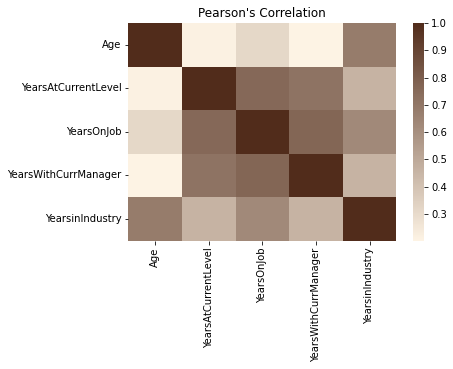

In [29]:
df.ads.pearson_plot()

# Co-relation ratio

In [31]:
df = pd.read_csv("orcl_attrition.csv",
                usecols=['JobFunction', 'Age', 'YearsinIndustry', 'YearsOnJob', 'YearsWithCurrManager', 'YearsAtCurrentLevel'])
df.ads.feature_type = {'Age': ['continuous'], 'YearsinIndustry': ['continuous'], 'YearsOnJob': ['continuous'], 
                     'YearsWithCurrManager': ['continuous'], 'YearsAtCurrentLevel': ['continuous'],
                      'JobFunction': ['category']}
df.ads.correlation_ratio()

,Column 1,Column 2,Value
0,Age,Age,1.0000
1,Age,JobFunction,0.0323
2,JobFunction,Age,0.0323
3,JobFunction,JobFunction,1.0000
4,JobFunction,YearsAtCurrentLevel,0.0580
5,JobFunction,YearsOnJob,0.0322
6,JobFunction,YearsWithCurrManager,0.0361
7,JobFunction,YearsinIndustry,0.0158
8,YearsAtCurrentLevel,JobFunction,0.0580
9,YearsAtCurrentLevel,YearsAtCurrentLevel,1.0000


<AxesSubplot:title={'center':'Correlation Ratio'}>

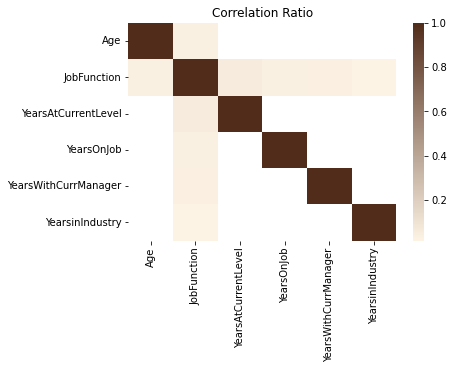

In [32]:
df.ads.correlation_ratio_plot()

In [33]:
df = pd.read_csv("orcl_attrition.csv",
                 usecols=['TravelForWork', 'JobFunction', 'EducationField', 'EducationalLevel'])
df.ads.feature_type = {'TravelForWork': ['category'], 'JobFunction': ['category'], 'EducationField': ['category'], 
                     'EducationalLevel': ['category']}
df.ads.cramersv()

,Column 1,Column 2,Value
0,EducationField,EducationField,1.0000
1,EducationField,EducationalLevel,0.0552
2,EducationField,JobFunction,0.5880
3,EducationField,TravelForWork,0.0000
4,EducationalLevel,EducationField,0.0552
5,EducationalLevel,EducationalLevel,1.0000
6,EducationalLevel,JobFunction,0.0000
7,EducationalLevel,TravelForWork,0.0000
8,JobFunction,EducationField,0.5880
9,JobFunction,EducationalLevel,0.0000


<AxesSubplot:title={'center':"Cramer's V"}>

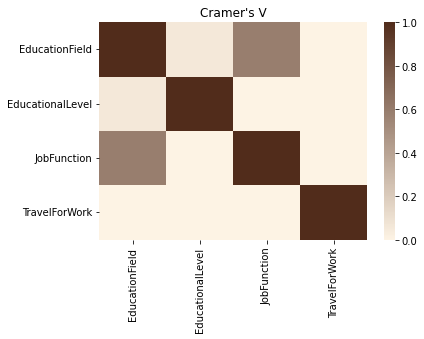

In [34]:
df.ads.cramersv_plot()

# Feature type warnings

In [35]:
visa = ["4532640527811543", "4556929308150929", "4539944650919740", "4485348152450846", "4556593717607190"]
amex = ["371025944923273", "374745112042294", "340984902710890", "375767928645325", "370720852891659"]
invalid = [np.nan, None, "", "123", "abc"]
series = pd.Series(visa + amex + invalid, name='creditcard')
series.ads.feature_type = ['credit_card']
series.ads.warning()

,Feature Type,Warning,Message,Metric,Value
0,credit_card,missing,2 missing values,count,2
1,credit_card,missing,13.3% missing values,percentage,13.33
2,credit_card,high-cardinality,15 unique values,count,15
3,string,missing,2 missing values,count,2
4,string,missing,13.3% missing values,percentage,13.33
5,string,high-cardinality,15 unique values,count,15


In [36]:
CreditCard = feature_type_manager.feature_type_object("credit_card")
CreditCard.warning.registered()

,Warning,Handler
0,missing_values,missing_values_handler
1,high_cardinality,high_cardinality_handler


In [37]:
def invalid_credit_card_handler(x:pd.Series) -> pd.DataFrame:
    value = len(x) - CreditCard.validator.is_credit_card(x).sum()
    if value>0:
        df = pd.DataFrame(columns=['Warning', 'Message', 'Metric', 'Value'])
        df['Value'] = [value]
        df['Warning'] = ['invalid credit card count']
        df['Message'] =[f"{df.Value.values[0]} invalid credit cards"]
        df["Metric"] = ["count"]
        return df

In [38]:
CreditCard.warning.register(name="invalid_credit_card", handler=invalid_credit_card_handler)

In [39]:
series.ads.warning_registered()

,Feature Type,Warning,Handler
0,credit_card,missing_values,missing_values_handler
1,credit_card,high_cardinality,high_cardinality_handler
2,credit_card,invalid_credit_card,invalid_credit_card_handler
3,string,missing_values,missing_values_handler
4,string,high_cardinality,high_cardinality_handler


In [40]:
series.ads.warning()

,Feature Type,Warning,Message,Metric,Value
0,credit_card,missing,2 missing values,count,2
1,credit_card,missing,13.3% missing values,percentage,13.33
2,credit_card,high-cardinality,15 unique values,count,15
3,credit_card,invalid credit card count,5 invalid credit cards,count,5
4,string,missing,2 missing values,count,2
5,string,missing,13.3% missing values,percentage,13.33
6,string,high-cardinality,15 unique values,count,15


In [41]:
CreditCard.validator.registered()

,Validator,Condition,Handler
0,is_credit_card,(),default_handler


In [42]:
df

,TravelForWork,JobFunction,EducationalLevel,EducationField
0,infrequent,Product Management,L2,Life Sciences
1,often,Software Developer,L1,Life Sciences
2,infrequent,Software Developer,L2,Other
3,often,Software Developer,L4,Life Sciences
4,infrequent,Software Developer,L1,Medical
...,...,...,...,...
1465,often,Software Developer,L2,Medical
1466,infrequent,Software Developer,L1,Medical
1467,infrequent,Software Developer,L3,Life Sciences
1468,often,Product Management,L3,Medical


,Column,Plot
0,TravelForWork,"AxesSubplot(0.125,0.125;0.775x0.755)"
1,JobFunction,"AxesSubplot(0.125,0.125;0.775x0.755)"
2,EducationalLevel,"AxesSubplot(0.125,0.125;0.775x0.755)"
3,EducationField,"AxesSubplot(0.125,0.125;0.775x0.755)"


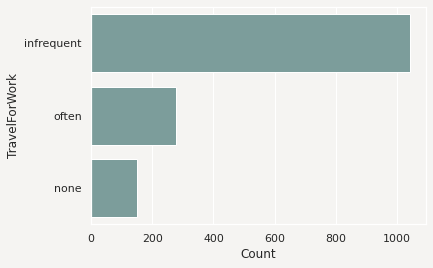

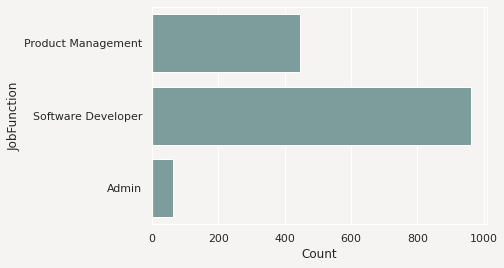

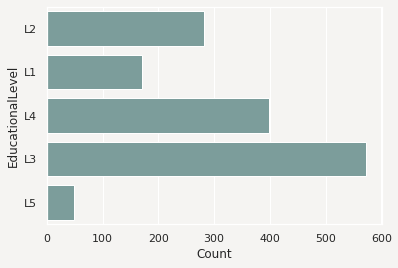

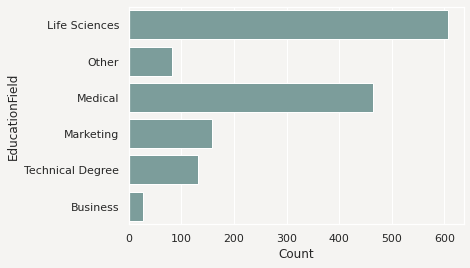

In [43]:
df.ads.feature_plot()